In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
import georasters as gr

In [2]:
# tiff5 = './assets/DHMVIIDSMRAS1m_k05.tif'
# tiff12 = "./assets/DHMVIIDSMRAS1m_k12.tif"
tiff13 = "./assets/DHMVIIDSMRAS1m_k13.tif"


In [ ]:
SHP13 = gpd.read_file('./assets/DHMVIIDSMRAS1m_k13/DHMVII_vdc_k13.shp')

## Geopandas tryout

In [ ]:
SHP13.head()

In [ ]:
type(SHP13)

In [ ]:
SHP13.boundary.plot() #only border info

In [ ]:
SHP13.geometry.plot()


In [ ]:
SHP13.geometry.shape

In [ ]:
SHP13.geometry[2]

In [ ]:
SHP13.crs

## RasterIO

## CREATE RASTERIO DATASET OBJECT

In [ ]:
geo13 = rasterio.open(tiff13)

## Get metadata

In [ ]:
geo13.meta

In [ ]:
geo13.crs

## Get raterio dataset's bounds

In [ ]:
geo13.bounds

In [ ]:
rasterio.plot.show(geo13,cmap='terrain') #to big!


In [ ]:
type(geo13)

In [ ]:
geo13.transform*(0,0)  #upper left coordinates

In [ ]:
geo13.profile


## window into a smaller part of the Geotiff

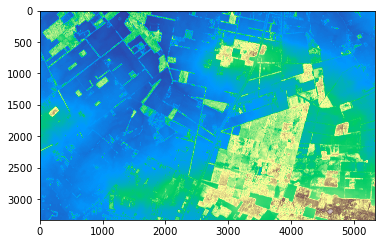

<AxesSubplot:>

In [6]:
import rasterio
width = 32000  #columns
height = 20000 #rows
with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    w = src.read(1, window=Window(width/2, height/2, width/6, height/6))

rasterio.plot.show(w,cmap='terrain')

In [ ]:
type(w)

NameError: name 'w' is not defined

## window resize from bounding box of Bruges!

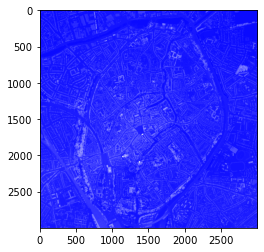

<AxesSubplot:>

In [7]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

Bruges_lamb_long = 70151.33
Bruges_lamb_lat = 211744.50

left = Bruges_lamb_long - 1500
right = Bruges_lamb_long + 1500
bottom = Bruges_lamb_lat - 1500
top = Bruges_lamb_lat + 1500

with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    
rasterio.plot.show(rst, cmap='bwr')


In [8]:
type(rst)

numpy.ndarray

In [9]:
rst.shape

(3000, 3000)

In [11]:
pandas_window = pd.DataFrame(rst)


In [14]:
type(pandas_window)

pandas.core.frame.DataFrame

In [13]:
pandas_window.info

<bound method DataFrame.info of        0      1      2      3      4      5     6     7      8      9     ...  \
0      9.71   4.68   4.47   4.48   4.42   4.42  4.46  5.85  10.55  11.46  ...   
1     10.66  10.34   6.31   4.57   4.46   4.42  4.43  4.46   8.17  10.71  ...   
2     11.23  11.34  10.39   6.39   4.48   4.47  4.42  4.43   4.45  10.13  ...   
3     11.79  12.28  11.42  10.57   7.65   4.48  4.77  4.48   4.43   4.45  ...   
4     12.31  13.70  12.38  11.54  10.69  10.04  4.48  4.90   4.41   4.42  ...   
...     ...    ...    ...    ...    ...    ...   ...   ...    ...    ...  ...   
2995  14.57  14.49  14.46  14.43   8.05   8.04  8.00  7.95   8.08   9.82  ...   
2996  14.02  13.96  13.85  13.81   8.04   8.06  7.92  7.96   7.89   9.82  ...   
2997  13.00  12.45  11.74   9.36   8.05   8.04  8.00  7.97   7.94   9.73  ...   
2998   8.05   8.05   8.05   8.03   8.03   8.02  8.02  7.99   7.93   9.08  ...   
2999   8.03   8.02   8.04   8.01   8.00   8.03  8.02  7.98   7.95   8.48  ...

## 3D plot of smaller window

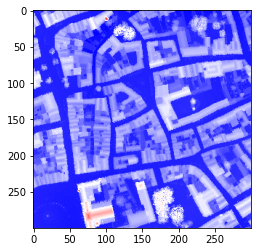

<AxesSubplot:>

In [53]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

Bruges_lamb_long = 70151.33
Bruges_lamb_lat = 211744.50

left = Bruges_lamb_long - 150
right = Bruges_lamb_long + 150
bottom = Bruges_lamb_lat - 150
top = Bruges_lamb_lat + 150

with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    
rasterio.plot.show(rst, cmap='bwr')


In [54]:
df_window = pd.DataFrame(rst)


In [55]:
from mpl_toolkits.mplot3d import Axes3D


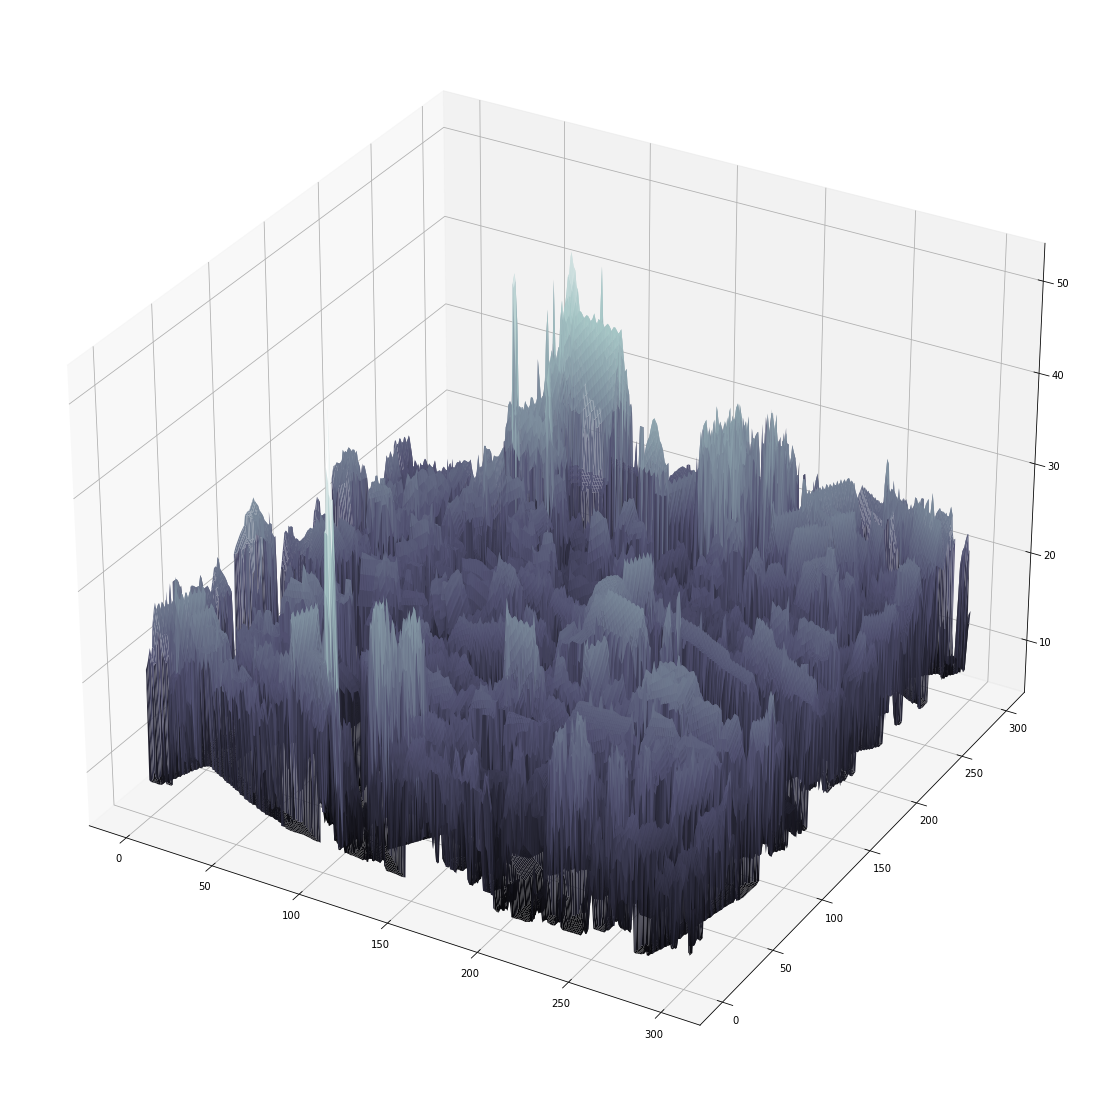

In [67]:
x = df_window.index
y = df_window.columns
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = df_window.values

figure = plt.figure(1, figsize = (20, 20))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="bone", linewidth=0.1)
plt.show()

## Plotly 3D plot

In [ ]:
fig = Figure(data=[go.Surface(z=brugge_df.values)])
fig.update_layout(title='Address', autosize=True)
fig.show()

## Reprojection with rasterio

In [ ]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling


In [ ]:

dst_crs = 'EPSG:31370'

with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open("./assets/DHMVIIDSMRAS1m_k13_reprj.tif", 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [ ]:
type(dst)

In [ ]:
rasterio.plot.show(dst,cmap='terrain') #to big!


## Convert tiff to pandas dataframe

In [3]:
df13 = gr.from_file("./assets/DHMVIIDSMRAS1m_k13.tif")


In [ ]:
df13.plot()

In [4]:
p_df13 = df13.to_pandas()

MemoryError: Unable to allocate 4.77 GiB for an array with shape (640000000,) and data type int64

## GPS coordinates of Brugge, Belgium. Latitude: 51.2089 Longitude: 3.2242

In [ ]:
# data5 = rasterio.open(tiff5)

# show(data5)

In [ ]:
# data13 = rasterio.open(tiff13)

# show(data13)

In [ ]:
# data13.meta

## GDAL

In [ ]:
# from osgeo import gdal
# import matplotlib.pyplot as plt

# dataset = gdal.Open(tiff12, gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
# band = dataset.GetRasterBand(1)
# arr = band.ReadAsArray()
# plt.imshow(arr)